https://totoma3.tistory.com/201

https://github.com/ralaruri/p_median_python

https://dacon.io/codeshare/1358

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/통합 Data/노인비율Data.xlsx')   #데이터셋 불러오기

In [ ]:
df.shape

(31, 5)

In [ ]:
df.head()

,시군구,노인 일자리 비율,독거노인 가구 비율,빈곤율,노인빈곤 순위 소계
0,가평군,0.119,12.4,27.3,99
1,고양시,0.043,5.5,14.8,84
2,과천시,0.038,5.8,8.4,25
3,광명시,0.050,6.3,15.3,76
4,광주시,0.031,4.3,9.1,24


In [ ]:
a=df['시군구'].values
a

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [ ]:
df=df.drop(['시군구'],axis=1)

In [ ]:
df

,노인 일자리 비율,독거노인 가구 비율,빈곤율,노인빈곤 순위 소계
0,0.119,12.4,27.3,99
1,0.043,5.5,14.8,84
2,0.038,5.8,8.4,25
3,0.050,6.3,15.3,76
4,0.031,4.3,9.1,24
5,0.080,5.7,18.1,59
6,0.069,5.9,11.3,24
7,0.040,4.6,15.9,100
8,0.040,5.3,20.8,101
9,0.107,10.4,30.7,49


In [ ]:
df.columns

Index(['노인 일자리 비율 ', '독거노인 가구 비율', '빈곤율', '노인빈곤 순위 소계'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

In [ ]:
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.describe() # 기초통계량

,노인 일자리 비율,독거노인 가구 비율,빈곤율,노인빈곤 순위 소계
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,4.011128e-16,-3.939501e-16,-2.865092e-16,1.074409e-17
std,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00
min,-1.315792e+00,-1.217708e+00,-1.561834e+00,-1.640231e+00
25%,-7.795912e-01,-5.837873e-01,-6.420093e-01,-8.049281e-01
50%,-5.114909e-01,-3.179497e-01,-2.400117e-01,-6.074929e-02
75%,6.949605e-01,1.114803e-01,8.365243e-01,8.808647e-01
max,2.207812e+00,2.790305e+00,2.335499e+00,1.670605e+00


In [ ]:
data_prime = scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

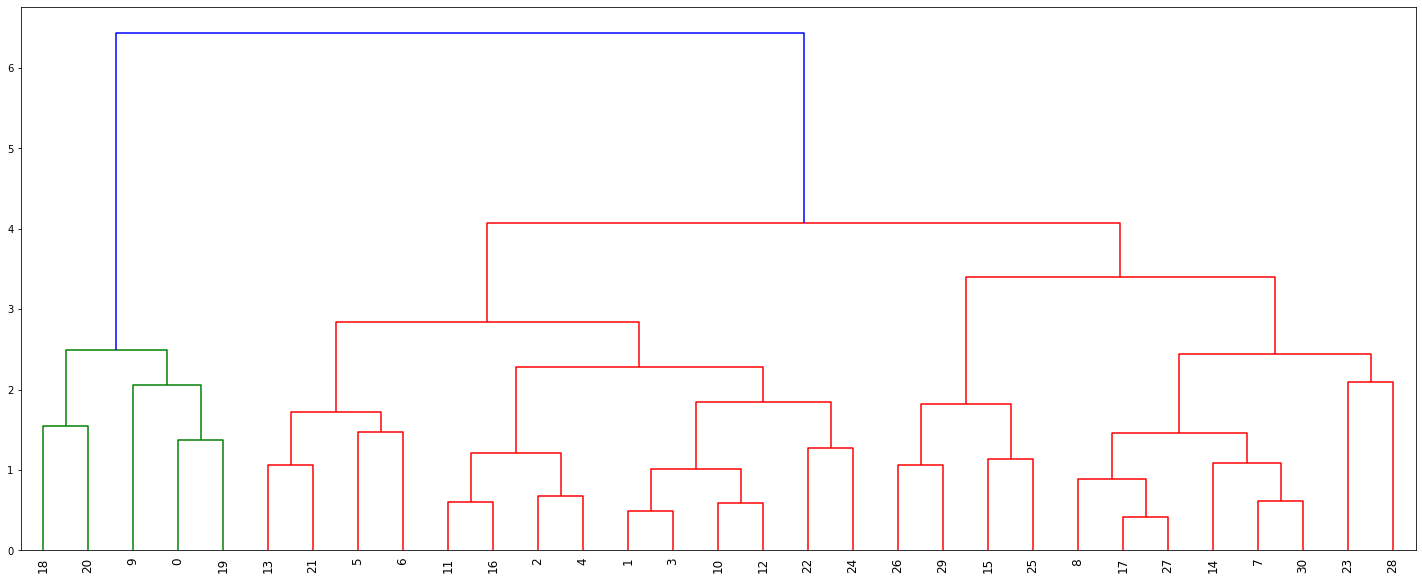

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=4, criterion='distance')
cut_tree

array([1, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 1, 1, 2,
       2, 3, 2, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

2    14
3    12
1     5
dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [ 0.56649048 -0.16856161  0.44151439 -0.08237867  0.41259053] 
Silhouette Score shape: (31,) 

Silhouette Average Score:0.262


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,노인 일자리 비율,독거노인 가구 비율,빈곤율,노인빈곤 순위 소계,hc_cluster,silhouette_coeff
0,2.207812,2.422223,1.013676,1.063113,1,0.566490
1,-0.702991,-0.399746,-0.689704,0.607493,2,-0.168562
2,-0.894491,-0.277052,-1.561834,-1.184611,2,0.441514
3,-0.434891,-0.072561,-0.621569,0.364496,2,-0.082379
4,-1.162592,-0.890523,-1.466445,-1.214986,2,0.412591
5,0.714111,-0.317950,-0.240012,-0.151873,2,0.011883
6,0.292810,-0.236154,-1.166650,-1.214986,2,0.414945
7,-0.817891,-0.767829,-0.539807,1.093487,3,0.238727
8,-0.817891,-0.481542,0.127918,1.123862,3,0.367257
9,1.748212,1.604261,1.476995,-0.455620,1,0.438099


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.482264
2    0.236090
3    0.200119
Name: silhouette_coeff, dtype: float64
표준편차: 0.15356930627491214


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
!pip install matplotlib==3.2.2

In [ ]:
pip install --upgrade seaborn

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

In [ ]:
data_prime.columns

Index(['노인 일자리 비율 ', '독거노인 가구 비율', '빈곤율', '노인빈곤 순위 소계', 'hc_cluster',
       'silhouette_coeff'],
      dtype='object')

No handles with labels found to put in legend.


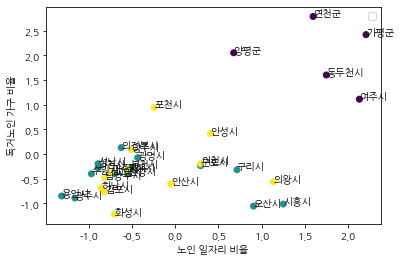

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인 일자리 비율 ']
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('노인 일자리 비율 ')
plt.ylabel('독거노인 가구 비율')
plt.legend()

Text(0, 0.5, '독거노인 가구 비율')

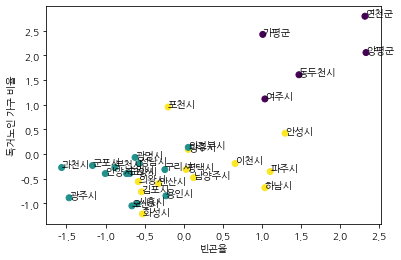

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['빈곤율']
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('빈곤율')
plt.ylabel('독거노인 가구 비율')

Text(0, 0.5, '독거노인 가구 비율')

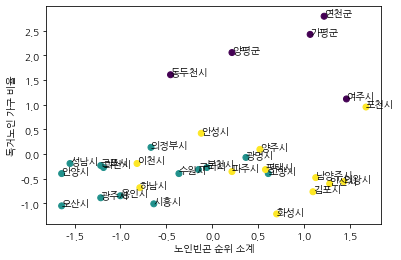

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인빈곤 순위 소계']
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('노인빈곤 순위 소계')
plt.ylabel('독거노인 가구 비율')

Text(0, 0.5, '빈곤율')

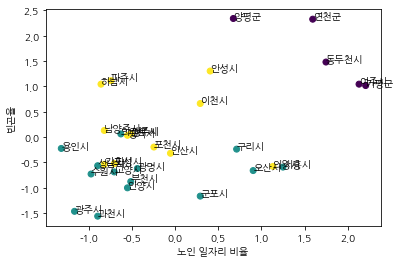

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인 일자리 비율 ']
y=data_prime['빈곤율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['hc_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.xlabel('노인 일자리 비율 ')
plt.ylabel('빈곤율')

# K Means 클러스터링

In [ ]:
data_prime = scaled.copy()

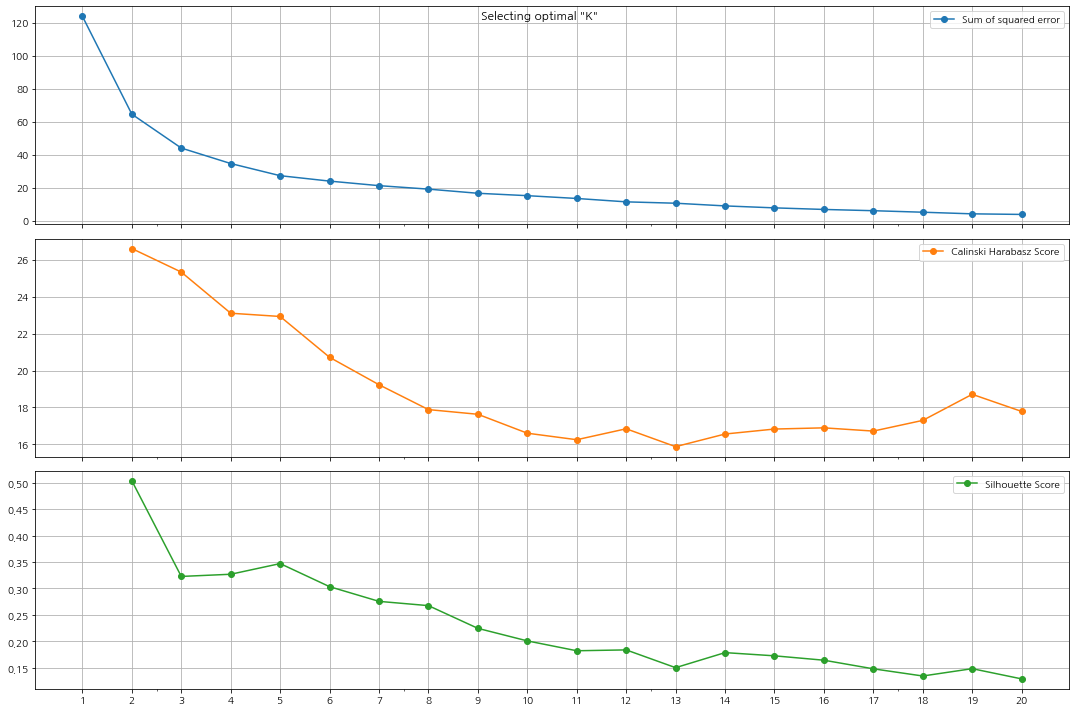

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=2, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,노인 일자리 비율,독거노인 가구 비율,빈곤율,노인빈곤 순위 소계
0,1.671612,1.996882,1.637794,0.698617
1,-0.321464,-0.384016,-0.314960,-0.134349


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.519


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.547204
1    0.514866
Name: k_silhouette_coeff, dtype: float64

Text(0, 0.5, '독거노인 가구 비율')

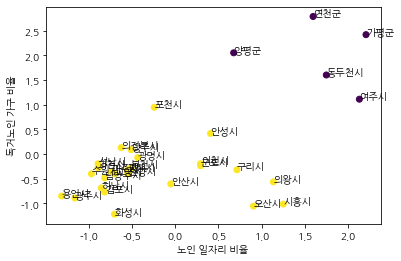

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인 일자리 비율 '] 
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel('노인 일자리 비율 ')
plt.ylabel('독거노인 가구 비율')

Text(0, 0.5, '독거노인 가구 비율')

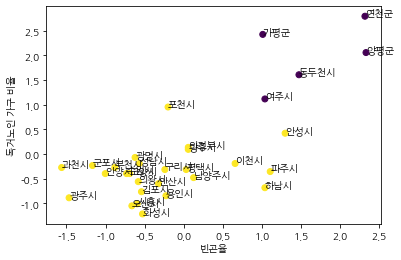

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['빈곤율'] 
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel('빈곤율')
plt.ylabel('독거노인 가구 비율')

Text(0, 0.5, '독거노인 가구 비율')

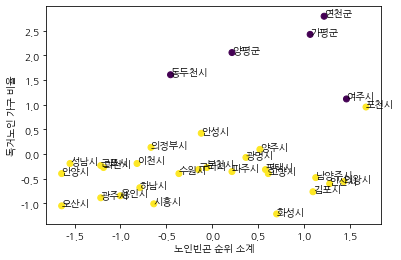

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인빈곤 순위 소계'] 
y=data_prime['독거노인 가구 비율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel('노인빈곤 순위 소계')
plt.ylabel('독거노인 가구 비율')

Text(0, 0.5, '빈곤율')

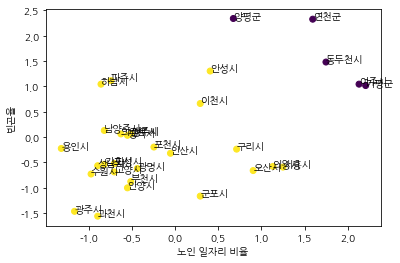

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=data_prime['노인 일자리 비율 '] 
y=data_prime['빈곤율']
n= a

fig, ax = plt.subplots()
ax.scatter(x, y,c=data_prime['k_means_cluster'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xlabel('노인 일자리 비율 ')
plt.ylabel('빈곤율')